In [141]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
#importing data into notebook
df = pd.read_csv('sbiinsurance.csv')

In [143]:
df.head()

,age,sex,bmi,children,smoker,region,insuranceclaim,charges
0,19,0,27.900,0,1,3,1,16884.92400
1,18,1,33.770,1,0,2,1,1725.55230
2,28,1,33.000,3,0,2,0,4449.46200
3,33,1,22.705,0,0,1,0,21984.47061
4,32,1,28.880,0,0,1,1,3866.85520


In [144]:
df.shape

(1338, 8)

In [145]:
df.describe()

,age,sex,bmi,children,smoker,region,insuranceclaim,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,0.585202,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,0.492871,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,1.000000,63770.428010


In [146]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
insuranceclaim    0
charges           0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
insuranceclaim    1338 non-null int64
charges           1338 non-null float64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [148]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'insuranceclaim',
       'charges'],
      dtype='object')


Text(0.5, 1.0, 'age vs charge')

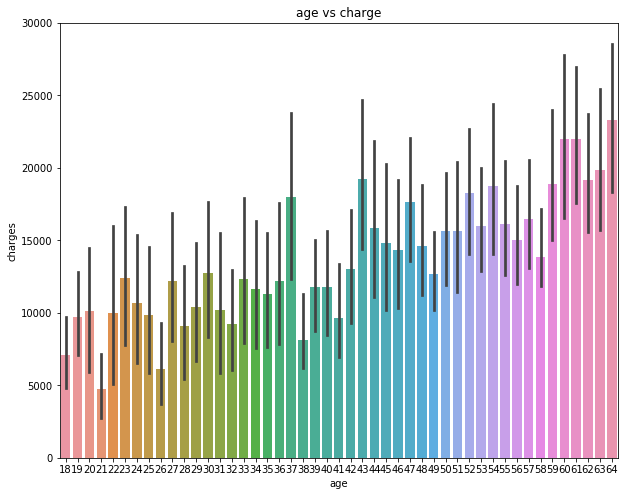

In [149]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'age' , y = 'charges', data=df)
plt.title("age vs charge")

Text(0.5, 1.0, 'sex vs charges')

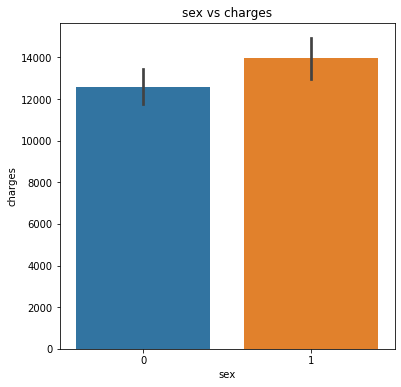

In [150]:
#sex vs charges as male have higher insurance charges than female
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

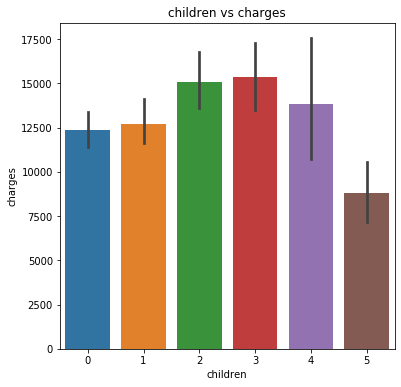

In [151]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'children', y = 'charges', data = df)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

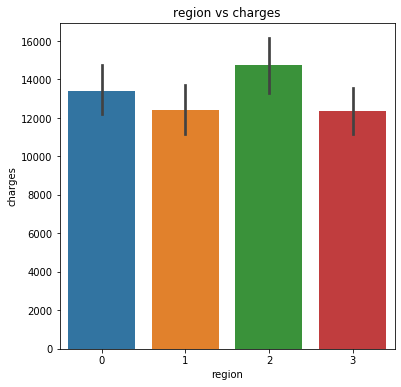

In [152]:
# region vs charges
plt.figure(figsize = (6,6))
sns.barplot(x = 'region', y = 'charges', data = df)

plt.title('region vs charges')

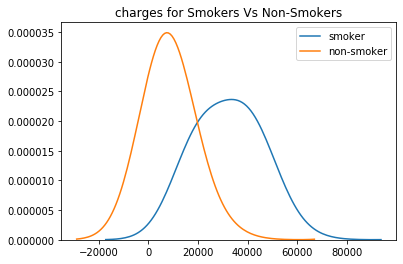

In [153]:
smoker = df[df['smoker']==1]
non_smoker = df[df['smoker']==0]

plt.title('charges for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], bw=10000, label='smoker')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

In [154]:
corr=df.corr()

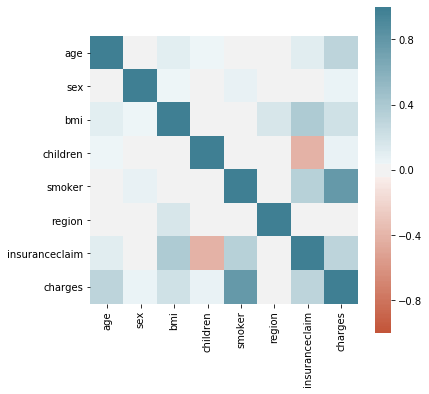

In [155]:
plt.figure(figsize = (6,6))
s = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)


In [156]:
# dropping columns from the dataset which is not needed
df = df.drop('region', axis = 1)

In [157]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'insuranceclaim', 'charges'], dtype='object')

In [158]:
#here we have sucessfully dropped a column
df.shape

(1338, 7)

In [160]:
# splitting the dependent variable (x) and independent variable (y)
x = df.iloc[:,:6]
y = df.iloc[:,6]

In [162]:
x.shape

(1338, 6)

In [163]:
y.shape

(1338,)

In [166]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [167]:
# scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [182]:
#Support vector machine
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# creating the model
m=SVR()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
mse = np.mean((y_test - y_pred)**2, axis = None)
print("mse:", mse)
rmse = np.sqrt(mse)
print("rmse:", rmse)
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

mse: 174770963.53232718
rmse: 13220.09695623777
r2 score: -0.13301476002678547


In [185]:
#using linear regression
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
#mean square error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)
# root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)
# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 37166899.258736454
RMSE : 6096.466128728713
r2 score : 0.7590523929520603


In [186]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)
#Root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)
#R2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 21553592.775767397
RMSE : 4642.58470851824
r2 score : 0.8602711900593596


In [189]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
m= DecisionTreeRegressor()
m.fit(x_train, y_train)
y_test_pred = m.predict(x_test)
y_train_pred = m.predict(x_train)
#Mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)
#Root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)
#R2 score
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r2 train score :", r2_train)
print("r2 test score :", r2_test)

MSE : 21553592.775767397
RMSE : 4642.58470851824
r2 train score : 0.998309536049973
r2 test score : 0.7591518600344366
